In [66]:
del colors

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns


In [152]:
# Plots accuracy, ood and confusion for a given dataset
#colors = ["#244C5B", "#EBB57C", "#C2504C", "#439888"]
pastel_colors = ['#F9B9AC', '#EAECC6', '#FFDBBE', '#FFEDB3', '#C4DF9B', '#AEE1E1', '#B0D8FF', '#B7B6E5', '#D7B8FF', '#FFB9D3', '#FFC6A2', '#FFEBAF', '#D1E2E5', '#C2D1E9', '#D9C3E6', '#E1C3C3', '#F3B9B9', '#F8E9A1', '#B1E7B6', '#B2B7F2']
pastel_colors = ['#CC4D19', '#CC9966', '#1E8B7A', '#704689', '#CCCC66', '#4D7326']
colors = ['darkred', 'darkorange', "darkgreen", "darkblue"]
def plot_accuracies(dfs, labels, max_points, savepath, window = 1, log=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    
    for (df, label, color) in zip(dfs, labels, colors):
        print(color)
        idx = df['accuracy'].values[:max_points] > 0
        ax[0].plot(df['accuracy'].values[:max_points][idx],
                   label=f"{label}\nACC = {round(df['accuracy'].values[-1],3)}", 
                   alpha = 0.8, color = color, lw = 3)
        ax[0].set_title('Accuracy ↑', fontsize = 15)
        #for x in np.arange(0, max_points, 50):
        #   ax[0,0].axvline(x, color = "firebrick", ls = "--", linewidth = "0.5")
        ax[0].set_xlim(0, len(idx))
        ax[0].set_ylim(0, 1.1)
        
        if log:
            ax[0,0].set_yscale("log")
        ax[0].grid(True)
        #ax[0,0].set_ylim(10e-2, 1.1)
        ax[0].legend()
        ax[0].tick_params( labelright=True)
        #ax[0].save_fig(savepath+"accuracy.pdf")
        
        moving_avg = df['moving_avg'].values[:max_points]
        moving_avg = [moving_avg[i:i+window].mean() for i in range(len(moving_avg))]
        ax[1].plot(moving_avg,
                   label=f"{label}\nACC = {round(moving_avg[-1], 3)}",
                   alpha = 0.8, color = color, lw = 3)
        ax[1].set_title('Moving Avg. Acc. ↑', fontsize = 15)
        ax[1].set_xlim(0, len(idx))
        ax[1].set_ylim(0, 1.1)
        if log:
            ax[1,1].set_yscale("log")
        ax[1].legend()
        ax[1].grid(True)
        ax[1].tick_params( labelright=True)
        #ax[0].save_fig(savepath+"moving_accuracy.pdf")
        plt.savefig(savepath+"accuracy.pdf")
        
        

def plot_OOD(dfs, labels, markersize, log=True):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    for i, (df, label, color) in enumerate(zip(dfs, labels, pastel_colors)):
        print(df['ood'].values[-1], df['type1_ood_error'].values[-1], label)

        ax.plot(i+1, df['ood'].values[-1], label=label, alpha = 0.8, color = color, ls = "", marker = ".", markersize = markersize)
        ax.plot(i+1, df['type1_ood_error'].values[-1], alpha = 0.8, color = color, ls = "", marker = "*", markersize = markersize)

    ax.set_title('OOD ↑', fontsize = 15)
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.grid(True)
    ax.tick_params( labelright=True)
    ax.set_xticklabels(labels)
    ax.set_xticks(range(1,len(labels)+1))
    
      
        


# Shuffled

**Accuracies**

firebrick
darkorange


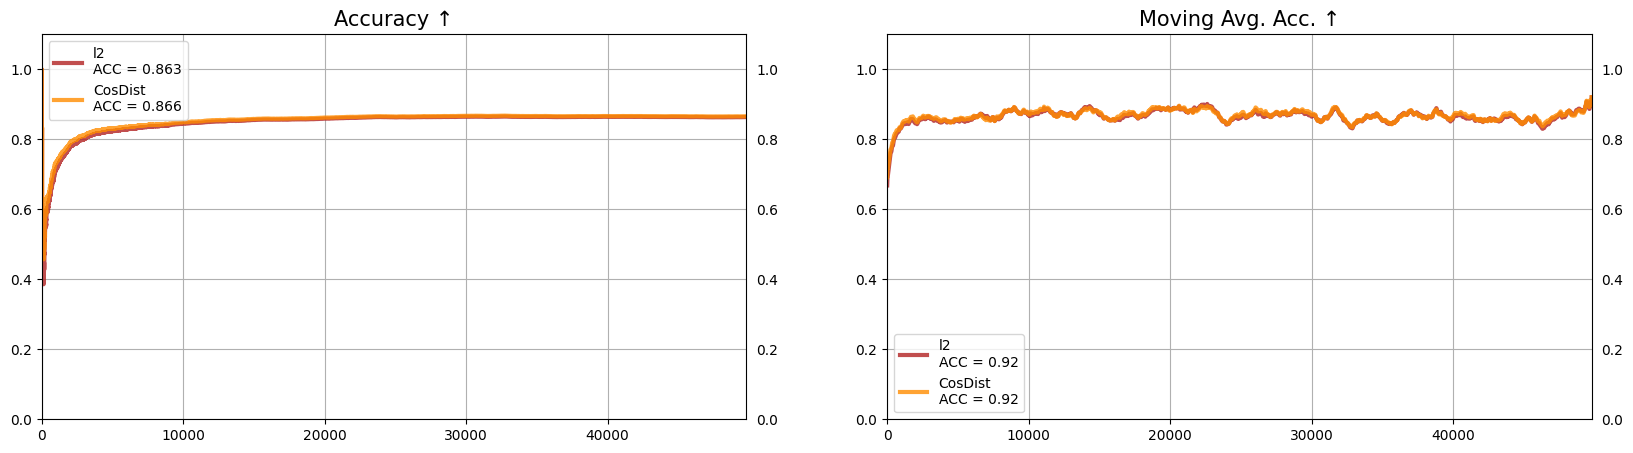

In [128]:
DATASET = 'CIFAR100'
MODEL = 'openCLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine"]#, "normalized_l2"]#, "inverse_cosine", "normalized_l2", "l1"]
LABELS = ["l2", "CosDist"]
PROCESSING_FRAMES = 1
THRESHOLDs = [18, 0.4, 0.8,] 
MAX_POINTS = 1000000000

SHUFFLED = 'shuffled'
PROBABILITY = '100'

dir_paths = [f"paper/results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_{SHUFFLED}_p{PROBABILITY}_slFalse/metrics_{format(THRESHOLD, '.2f')}.csv" for (DISTANCE_TYPE, THRESHOLD) in zip(DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]

plot_accuracies(dfs, LABELS, MAX_POINTS, savepath=f"paper/results/{DATASET}_{PROCESSING_FRAMES}_{MODEL}_{SHUFFLED}_p{PROBABILITY}_slFalse_",  window = 1000, log=False)

**OOD**

['paper/results/CORE50_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv', 'paper/results/CORE50_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv', 'paper/results/CIFAR100_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv', 'paper/results/CIFAR100_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv', 'paper/results/CelebA_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv', 'paper/results/CelebA_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv']
0.9 0.0025575447570332 CORE50 l2
0.8 0.0025575447570332 CORE50 CosDist
0.37 0.0004024063902134 CIFAR100 l2
0.4 0.0098589565602301 CIFAR100 CosDist
0.0172119140625 0.0005181045146332 CelebA l2
0.02001953125 0.0026747145567939 CelebA CosDist


/tmp/ipykernel_5866/1522402592.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


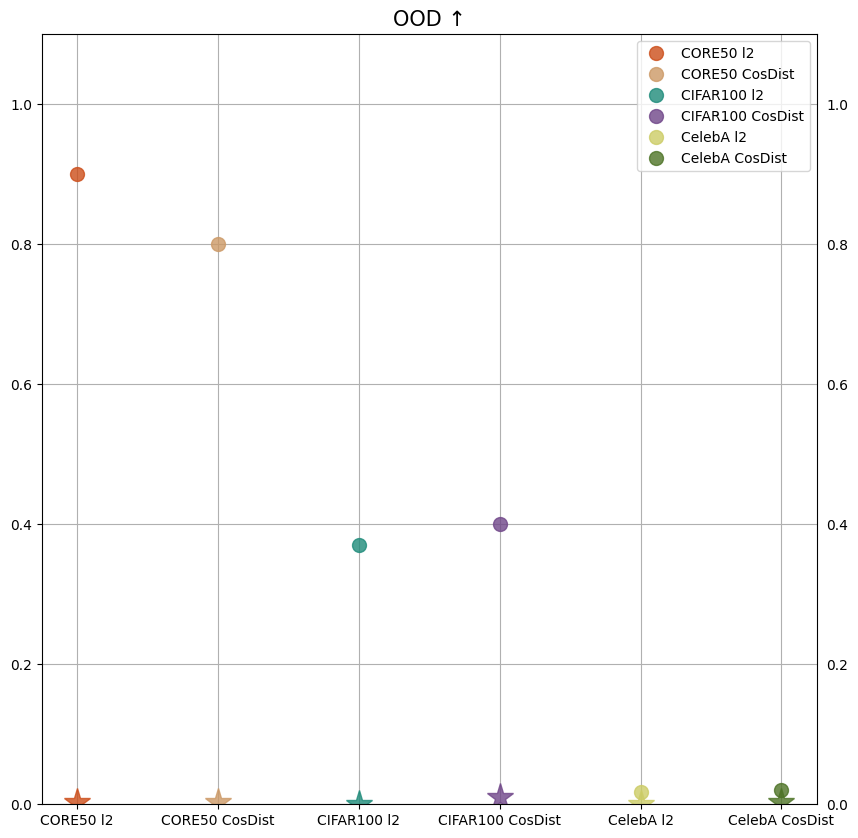

In [147]:
DATASETs = ["CORE50"]*2+['CIFAR100']*2+["CelebA"]*2 
MODEL = 'openCLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine"]*3#, "normalized_l2"]#, "inverse_cosine", "normalized_l2", "l1"]
LABELS = ["CORE50 l2", "CORE50 CosDist","CIFAR100 l2", "CIFAR100 CosDist","CelebA l2", "CelebA CosDist"]
PROCESSING_FRAMES = 1
THRESHOLDs = [18, 0.4]*3
MAX_POINTS = 1000000000

SHUFFLED = 'shuffled'
PROBABILITY = '100'

dir_paths = [f"paper/results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_{SHUFFLED}_p{PROBABILITY}_slFalse/metrics_{format(THRESHOLD, '.2f')}.csv" for (DATASET, DISTANCE_TYPE, THRESHOLD) in zip(DATASETs, DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
print(dir_paths)

plot_OOD(dfs, LABELS, markersize=20)

**selflabeling**


['paper/results/CORE50_inverse_cosine_1_openCLIP_shuffled_p0_slTrue/metrics_0.40.csv', 'paper/results/CORE50_inverse_cosine_1_openCLIP_shuffled_p0_slFalse/metrics_0.40.csv']
darkred
darkorange


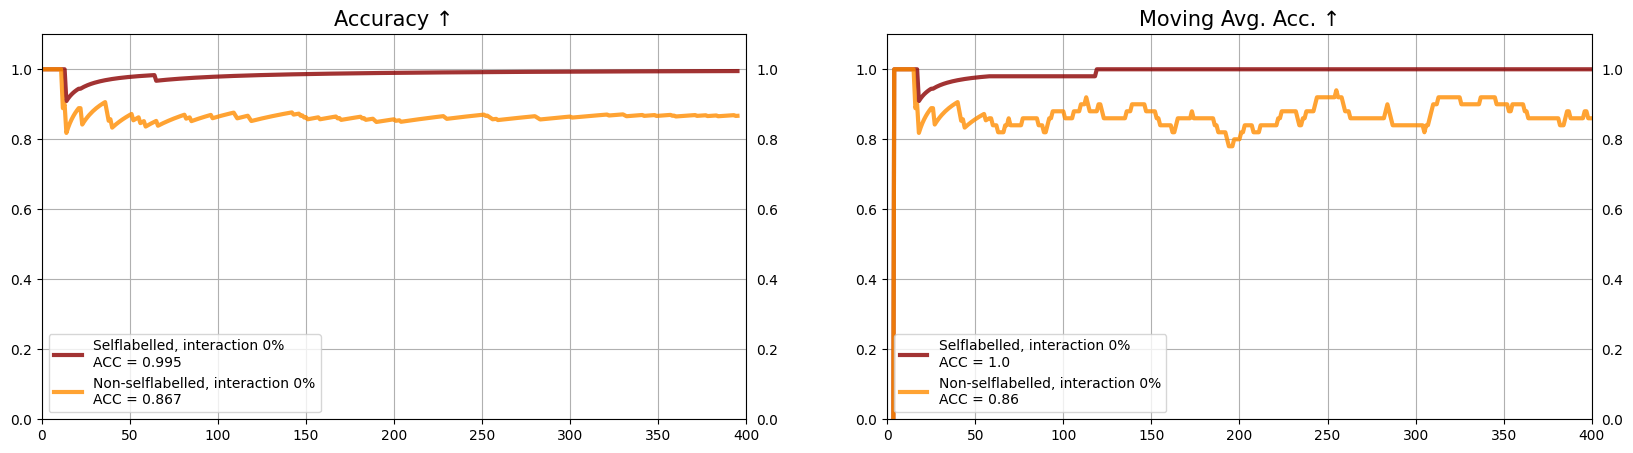

In [156]:
DATASET = 'CORE50'
MODEL = 'openCLIP'
DISTANCE_TYPE = "inverse_cosine"#, "normalized_l2"]#, "inverse_cosine", "normalized_l2", "l1"]
LABELS = ["Selflabelled, interaction 0%", "Non-selflabelled, interaction 0%"]#, "Selflabelled, interaction 10%", "Non-selflabelled, interaction 10%", ]
PROCESSING_FRAMES = 1
THRESHOLD = 0.4 
MAX_POINTS = 1000000000

SHUFFLED = 'shuffled'
PROBABILITIES = ['0', "0"]#, "10", "10"]
SELFLABELINGS = ["True", "False"]

dir_paths = [f"paper/results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_{SHUFFLED}_p{PROBABILITY}_sl{SELFLABELING}/metrics_{format(THRESHOLD, '.2f')}.csv" for (SELFLABELING, PROBABILITY) in zip(SELFLABELINGS, PROBABILITIES)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
print(dir_paths)
plot_accuracies(dfs, LABELS, MAX_POINTS, savepath=f"paper/results/{DATASET}_{MODEL}_selflabelling_",  window = 1, log=False)

# Shuffled

In [118]:
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine", "normalized_l2", "l1"]
PROCESSING_FRAMES = 30
THRESHOLDs = [6.7, 1.25, 1.8, 2.7] 
MAX_POINTS = 500

dir_paths = [f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_shuffled/metrics_{format(THRESHOLD, '.2f')}.csv" for (DISTANCE_TYPE, THRESHOLD) in zip(DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
plot(dfs, DISTANCE_TYPEs, MAX_POINTS)

FileNotFoundError: [Errno 2] No such file or directory: 'results/CORE50_l2_30_CLIP_shuffled/metrics_6.70.csv'

# Accuracy vs Human interaction

In [ ]:
import pickle as pkl
import matplotlib.pyplot as plt
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPE = 'l2'
PROCESSING_FRAMES = 1
THRESHOLD = 6.7
MAX_POINTS = 500
accuracies = []
probabilities = [i*10 for i in range(11)]
for p in probabilities:
    path = f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_shuffled_p{p}/matrix_t6.70.pkl"
    with open(path, "rb") as f:
        m = pkl.load(f)
        accuracies.append(m.accuracy())
plt.plot(probabilities, accuracies, marker = ".", ls = "", ms = 10, color = "firebrick")
plt.ylim((0,1))
plt.grid()
plt.tick_params( labelright=True)
plt.xticks(probabilities)

In [ ]:
results/CORE50_l2_1_CLIP_shuffled_p60/matrix_t6.70.pkl